In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("docking.csv")
data

,No.,Nama Kapal,No. Kontrol,Owner,Tanggal Docking,Tanggal Undocking,Rentang Waktu (Hari),Nama Dock
0,1.0,TB Fatimah,R21TBFXA,PT. PELAYARAN ALBA BERKAH SAMUDERA,12/30/2021,1/14/2022,15.0,Irian
1,2.0,KM Mutiara Barat,R21MTBXA,PT ARMADA INDONESIA MANDIRI,12/31/2021,1/14/2022,14.0,Irian
2,3.0,AHT Patrona 118,R22PTNXA,PT SOWOHI KENTITI JAYA,1/15/2022,1/28/2022,13.0,Surabaya
3,4.0,KMP Niki Sejahtera,R21NSJXA,PT. BERLIAN LAUTAN SEJAHTERA,1/16/2022,2/4/2022,19.0,Irian
4,5.0,KM Tilong Kabila,R22TLKXA,PT PELNI,1/30/2022,2/18/2022,19.0,Surabaya
...,...,...,...,...,...,...,...,...
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_clean = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No.                   138 non-null    float64
 1   Nama Kapal            138 non-null    object 
 2   No. Kontrol           129 non-null    object 
 3   Owner                 136 non-null    object 
 4   Tanggal Docking       138 non-null    object 
 5   Tanggal Undocking     138 non-null    object 
 6   Rentang Waktu (Hari)  138 non-null    float64
 7   Nama Dock             138 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.0+ KB


In [5]:
# ubah tipe data ke datetime
data['Tanggal Docking'] = pd.to_datetime(data['Tanggal Docking'])

In [6]:
# periksa nilai tidak valid
invalid_values = data['Rentang Waktu (Hari)'].isna().sum()
print("Jumlah nilai tidak valid:", invalid_values)

Jumlah nilai tidak valid: 52


In [7]:
# hapus nilai tidak valid
if invalid_values > 0:
    data = data.dropna(subset=['Rentang Waktu (Hari)'])
    print("Nilai tidak valid berhasil dihapus.")
else:
    print("Tidak ada nilai tidak valid yang ditemukan.")

Nilai tidak valid berhasil dihapus.


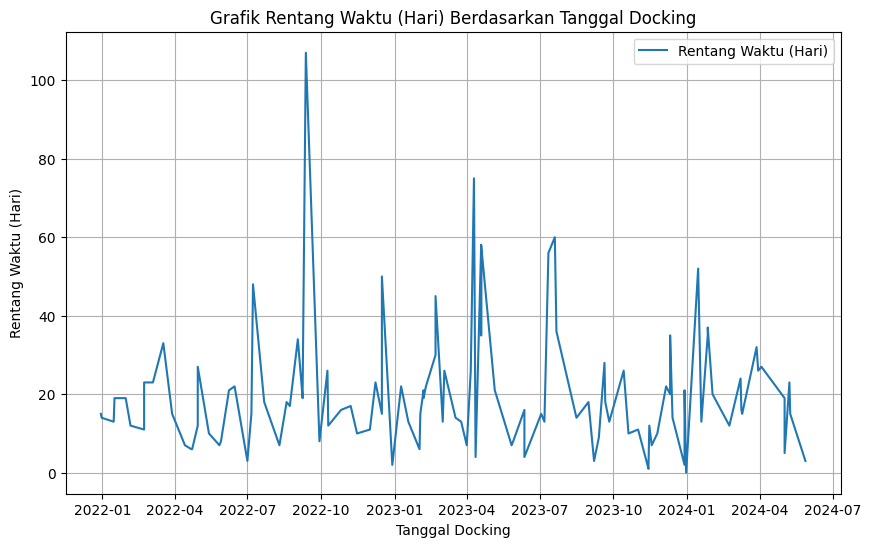

In [8]:
# visualisasi plot
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal Docking'], data['Rentang Waktu (Hari)'], label='Rentang Waktu (Hari)')
plt.xlabel('Tanggal Docking')
plt.ylabel('Rentang Waktu (Hari)')
plt.title('Grafik Rentang Waktu (Hari) Berdasarkan Tanggal Docking')
plt.legend()
plt.grid(True)

In [9]:
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

In [10]:
data = data.interpolate(method='linear')

/tmp/ipython-input-3594501123.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method='linear')


In [11]:
# deteksi outlier menggunakan z-score
z_score = stats.zscore(data['Rentang Waktu (Hari)'])
threshold = 3
outliers_z = np.where(np.abs(z_score) > threshold)[0]

print(f"Jumlah outlier menggunakan Z-score: {len('outliers_z')}")

Jumlah outlier menggunakan Z-score: 10


In [12]:
# deteksi outlier menggunakan IQR
Q1 = np.percentile(data['Rentang Waktu (Hari)'], 25)
Q3 = np.percentile(data['Rentang Waktu (Hari)'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = np.where((data['Rentang Waktu (Hari)'] < lower_bound) | (data['Rentang Waktu (Hari)'] > upper_bound))[0]

print(f"Jumlah outlier menggunakan IQR: {len(outliers_iqr)}")

Jumlah outlier menggunakan IQR: 11


In [13]:
# deteksi outlier menggunakan isolation forest
clf = IsolationForest(contamination=0.05)
clf.fit(data[['Rentang Waktu (Hari)']])
outliers_if = np.where(clf.predict(data[['Rentang Waktu (Hari)']]) == -1)[0]

print(f"Jumlah outlier menggunakan Isolation Forest: {len(outliers_if)}")

Jumlah outlier menggunakan Isolation Forest: 7


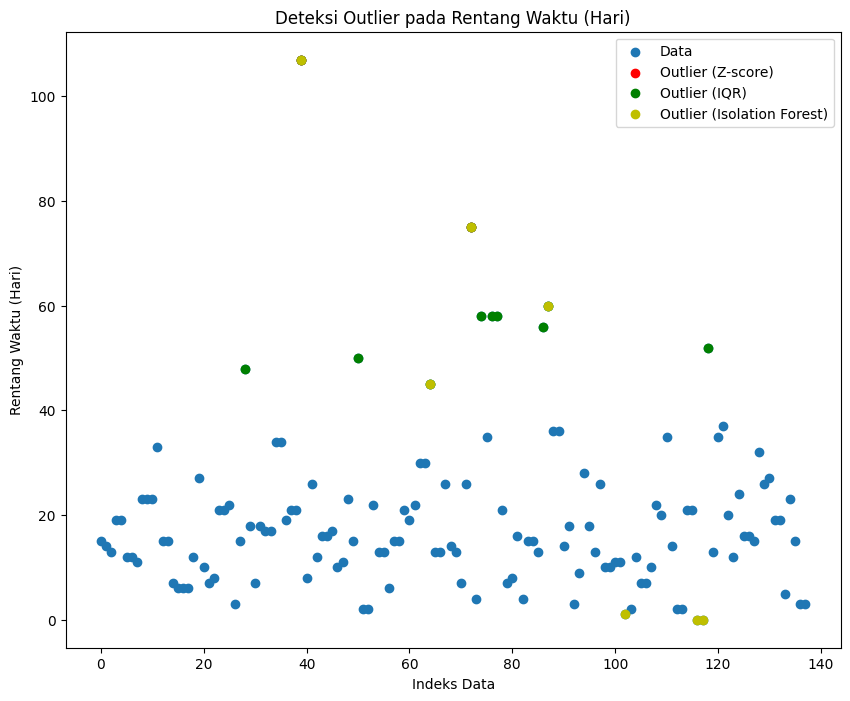

In [14]:
# visualisasi menggunakan scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data.index, data['Rentang Waktu (Hari)'], label='Data')
plt.scatter(data.index[outliers_z], data['Rentang Waktu (Hari)'].iloc[outliers_z],
color='r', label='Outlier (Z-score)')
plt.scatter(data.index[outliers_iqr], data['Rentang Waktu (Hari)'].iloc[outliers_iqr], color='g', label='Outlier (IQR)')
plt.scatter(data.index[outliers_if], data['Rentang Waktu (Hari)'].iloc[outliers_if], color='y', label='Outlier (Isolation Forest)')
plt.title('Deteksi Outlier pada Rentang Waktu (Hari)')
plt.xlabel('Indeks Data')
plt.ylabel('Rentang Waktu (Hari)')
plt.legend()
plt.show()

In [15]:
# Konversi tanggal
data['Tanggal Docking'] = pd.to_datetime(data['Tanggal Docking'], errors='coerce')
data['Tanggal Undocking'] = pd.to_datetime(data['Tanggal Undocking'], errors='coerce')

# === Statistik Numerik ===
stat_num = data[['Rentang Waktu (Hari)']].describe().T  # Transpose biar rapi

# === Statistik Kategorikal ===
stat_cat = data[['Nama Kapal', 'No. Kontrol', 'Owner', 'Nama Dock']].describe(include=['object']).T

# === Statistik Datetime ===
datetime_stats = []
for col in ['Tanggal Docking', 'Tanggal Undocking']:
    datetime_stats.append({
        'Kolom': col,
        'Min': data[col].min(),
        'Max': data[col].max(),
        'Range': data[col].max() - data[col].min()
    })
stat_date = pd.DataFrame(datetime_stats)

# Tampilkan hasil
print("=== Statistik Numerik ===")
display(stat_num)

print("=== Statistik Kategorikal ===")
display(stat_cat)

print("=== Statistik Datetime ===")
display(stat_date)


=== Statistik Numerik ===


,count,mean,std,min,25%,50%,75%,max
Rentang Waktu (Hari),138.0,19.449275,15.593407,0.0,10.25,15.5,23.0,107.0


=== Statistik Kategorikal ===


,count,unique,top,freq
Nama Kapal,138,110,KM Sinabung,3
No. Kontrol,129,107,R22PTNXA,3
Owner,136,44,PT PELNI,23
Nama Dock,138,3,Irian,66


=== Statistik Datetime ===


,Kolom,Min,Max,Range
0,Tanggal Docking,2021-12-30,2024-05-28,880 days
1,Tanggal Undocking,2022-01-14,2024-05-31,868 days


In [16]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [17]:
result = adfuller(data['Rentang Waktu (Hari)'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.122992
p-value: 0.235370


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})

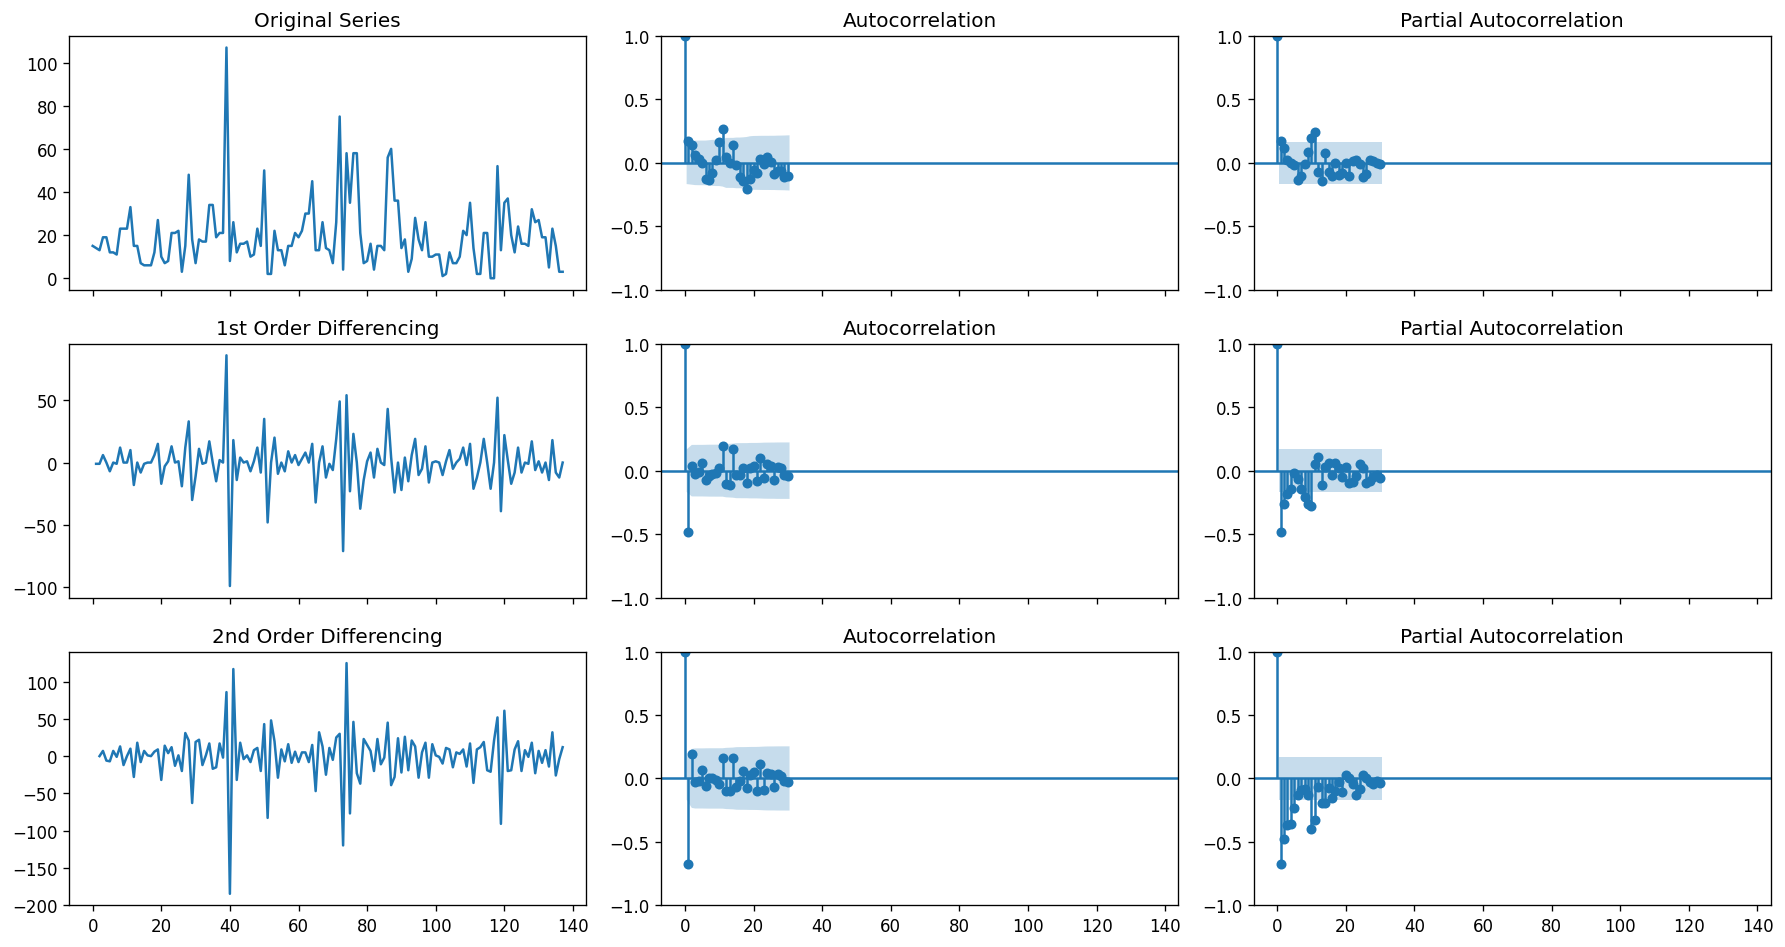

In [19]:
# original series
fig, axes = plt.subplots(3, 3, sharex=True)

# --- Original Series ---
axes[0,0].plot(data['Rentang Waktu (Hari)'])
axes[0,0].set_title('Original Series')
plot_acf(data['Rentang Waktu (Hari)'].dropna(), ax=axes[0,1], lags=30)
plot_pacf(data['Rentang Waktu (Hari)'].dropna(), ax=axes[0,2], lags=30)

# --- 1st Order Differencing ---
axes[1,0].plot(data['Rentang Waktu (Hari)'].diff())
axes[1,0].set_title('1st Order Differencing')
plot_acf(data['Rentang Waktu (Hari)'].diff().dropna(), ax=axes[1,1], lags=30)
plot_pacf(data['Rentang Waktu (Hari)'].diff().dropna(), ax=axes[1,2], lags=30)

# --- 2nd Order Differencing ---
axes[2,0].plot(data['Rentang Waktu (Hari)'].diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(data['Rentang Waktu (Hari)'].diff().diff().dropna(), ax=axes[2,1], lags=30)
plot_pacf(data['Rentang Waktu (Hari)'].diff().diff().dropna(), ax=axes[2,2], lags=30)

plt.tight_layout()
plt.show()

[best] order=(0, 0, 0) seasonal=(0, 0, 0, 0) AIC=7990.17
[best] order=(0, 0, 1) seasonal=(0, 0, 0, 0) AIC=6832.71
[best] order=(0, 0, 2) seasonal=(0, 0, 0, 0) AIC=5969.41
[best] order=(0, 1, 0) seasonal=(0, 0, 0, 0) AIC=4602.26
[best] order=(0, 1, 1) seasonal=(0, 0, 0, 0) AIC=4263.65
[best] order=(0, 1, 2) seasonal=(0, 0, 0, 0) AIC=4254.95
[best] order=(1, 0, 2) seasonal=(0, 0, 0, 0) AIC=4251.24
[best] order=(2, 0, 1) seasonal=(0, 0, 0, 0) AIC=4250.68
[best] order=(2, 0, 2) seasonal=(0, 0, 0, 0) AIC=4245.64
[best] order=(0, 1, 1) seasonal=(0, 0, 1, 7) AIC=4233.30
[best] order=(0, 1, 1) seasonal=(0, 1, 1, 7) AIC=4232.04
[best] order=(0, 1, 1) seasonal=(1, 1, 1, 7) AIC=4231.21
[best] order=(0, 1, 2) seasonal=(0, 0, 1, 7) AIC=4225.24
[best] order=(0, 1, 2) seasonal=(0, 1, 1, 7) AIC=4220.32
[best] order=(0, 1, 2) seasonal=(1, 1, 1, 7) AIC=4220.01


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[best] order=(1, 0, 1) seasonal=(0, 1, 1, 7) AIC=4211.24


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[best] order=(1, 0, 2) seasonal=(0, 1, 1, 7) AIC=4198.08


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[best] order=(2, 0, 1) seasonal=(0, 1, 1, 7) AIC=4193.64


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[best] order=(2, 0, 2) seasonal=(0, 1, 1, 7) AIC=4183.72

=== BEST MODEL ===
order=(2, 0, 2)  seasonal_order=(0, 1, 1, 7)  AIC=4183.72
                                      SARIMAX Results                                      
Dep. Variable:                Rentang Waktu (Hari)   No. Observations:                  881
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 7)   Log Likelihood               -2085.861
Date:                             Sun, 14 Sep 2025   AIC                           4183.723
Time:                                     15:09:50   BIC                           4212.292
Sample:                                 12-30-2021   HQIC                          4194.658
                                      - 05-28-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

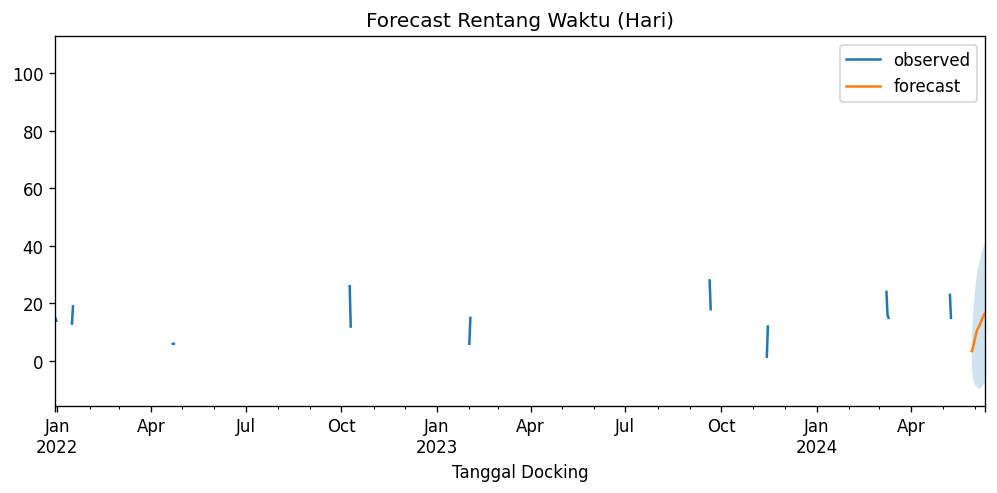

In [24]:
# === QUICK AUTO ARIMA/SARIMA (tanpa pmdarima) ===
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 1) Fungsi quick-mode (grid kecil & cepat)
def auto_arima_sm_quick(
    ts: pd.Series,
    seasonal_candidates=(None, 7),   # coba ARIMA & musiman mingguan. Ubah ke (None,) jika yakin non-seasonal
    max_p=2, max_d=1, max_q=2,       # grid kecil agar cepat
    max_P=1, max_D=1, max_Q=1,
    criterion="aic",                 # bisa "bic" kalau mau model lebih sederhana
    enforce_stationarity=False,
    enforce_invertibility=False,
    verbose=True
):
    assert isinstance(ts.index, pd.DatetimeIndex), "ts harus berindex DatetimeIndex"
    # rapikan ke frekuensi harian & isi gap sederhana
    ts = ts.sort_index().asfreq("D").interpolate(limit_direction="both")

    pdq = list(itertools.product(range(max_p+1), range(max_d+1), range(max_q+1)))
    def crit(res): return res.aic if criterion.lower()=="aic" else res.bic

    best = {"criterion_value": np.inf, "order": None, "seasonal_order": (0,0,0,0), "m": None, "result": None}

    for m in seasonal_candidates:
        if m in (None, 0):
            seasonal_orders = [(0,0,0,0)]  # ARIMA
        else:
            seasonal_orders = [(P,D,Q,m) for P in range(max_P+1)
                                         for D in range(max_D+1)
                                         for Q in range(max_Q+1)]
        for order in pdq:
            for sorder in seasonal_orders:
                try:
                    res = SARIMAX(ts, order=order, seasonal_order=sorder,
                                  enforce_stationarity=enforce_stationarity,
                                  enforce_invertibility=enforce_invertibility).fit(disp=False)
                    val = crit(res)
                    if np.isfinite(val) and val < best["criterion_value"]:
                        best = {"criterion_value": float(val),
                                "order": order,
                                "seasonal_order": sorder,
                                "m": None if sorder==(0,0,0,0) else sorder[3],
                                "result": res}
                        if verbose:
                            print(f"[best] order={order} seasonal={sorder} {criterion.upper()}={val:.2f}")
                except Exception:
                    # lewati kombinasi yang gagal konvergen
                    continue
    if verbose and best["result"] is not None:
        print("\n=== BEST MODEL ===")
        print(f"order={best['order']}  seasonal_order={best['seasonal_order']}  {criterion.upper()}={best['criterion_value']:.2f}")
    return best


# 2) Baca & siapkan data kamu (docking.csv)
data = pd.read_csv("docking.csv")

# pastikan tipe tanggal benar
data["Tanggal Docking"] = pd.to_datetime(data["Tanggal Docking"], errors="coerce")

# ambil metrik yang mau dimodelkan: rata-rata 'Rentang Waktu (Hari)' per tanggal
ts = (data
      .dropna(subset=["Tanggal Docking", "Rentang Waktu (Hari)"])
      .groupby("Tanggal Docking", as_index=True)["Rentang Waktu (Hari)"]
      .mean()
      .sort_index())

# kalau mau ambil baris pertama per tanggal (bukan agregasi), pakai ini sebagai ganti blok di atas:
# ts = (data.dropna(subset=["Tanggal Docking"])
#           .sort_values("Tanggal Docking")
#           .dropna(subset=["Rentang Waktu (Hari)"])
#           .set_index("Tanggal Docking")["Rentang Waktu (Hari)"])
# ts = ts[~ts.index.duplicated(keep="first")]  # pastikan index unik


# 3) Cari model terbaik (cepat)
best = auto_arima_sm_quick(
    ts,
    seasonal_candidates=(None, 7),   # coba non-seasonal & mingguan. Ganti (None,) jika tidak musiman
    max_p=2, max_d=1, max_q=2,
    max_P=1, max_D=1, max_Q=1,
    criterion="aic",
    verbose=True
)

res = best["result"]
print(res.summary())

# 4) Forecast 14 hari ke depan + plot
n_steps = 14
fc = res.get_forecast(n_steps)
pred = fc.predicted_mean
conf = fc.conf_int()

print("\nForecast head:")
print(pred.head())

ax = ts.asfreq("D").plot(figsize=(10,4), label="observed")
pred.plot(ax=ax, label="forecast")
ax.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.2)
plt.legend(); plt.title("Forecast Rentang Waktu (Hari)"); plt.show()

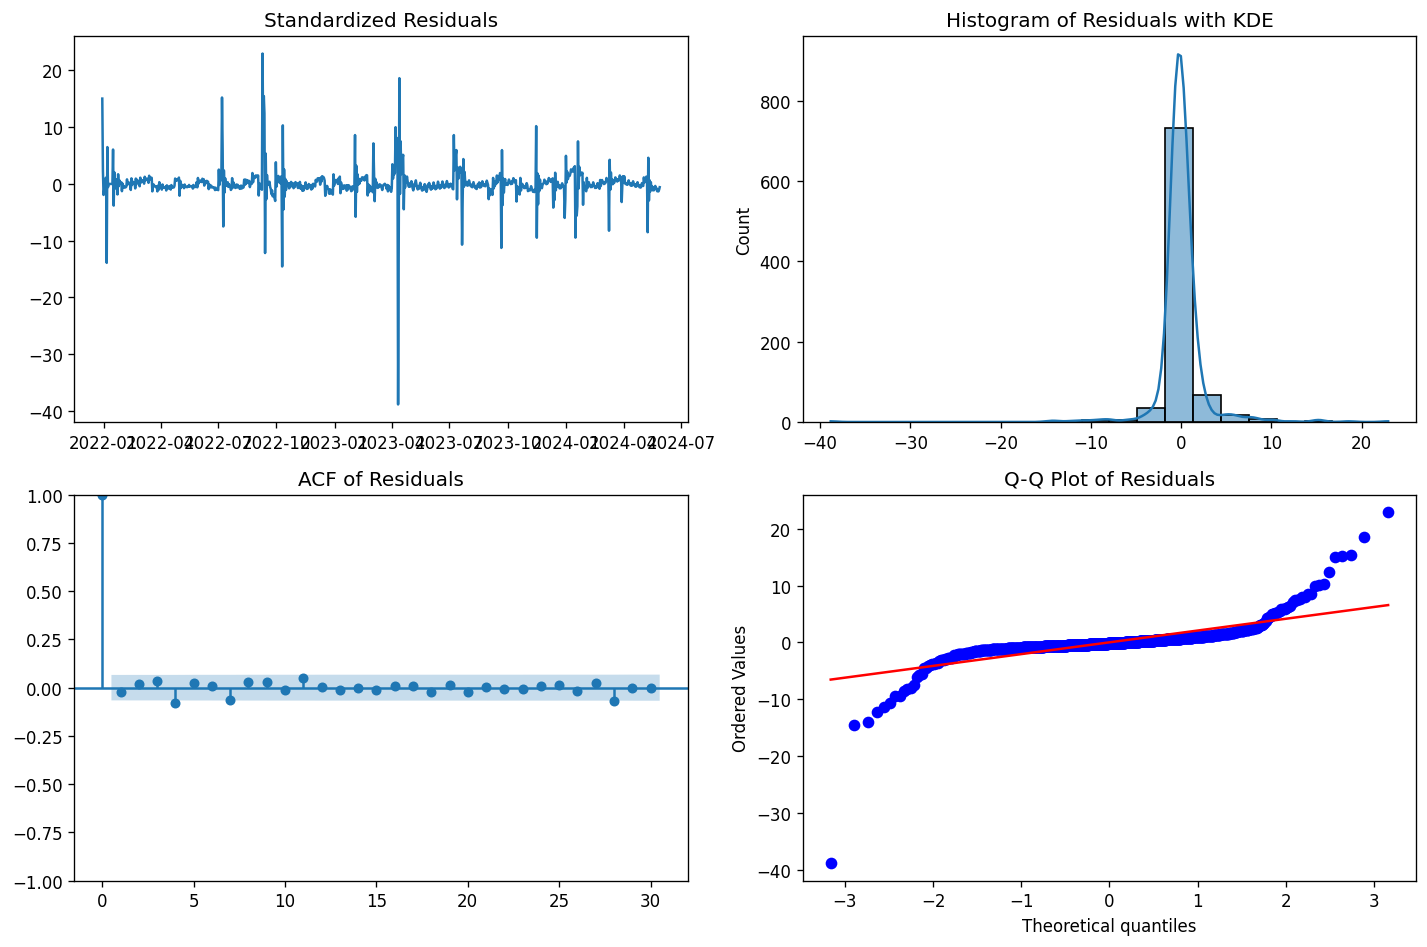

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf

# --- ambil residual dari model ---
residuals = res.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standardized residuals
axes[0,0].plot(residuals)
axes[0,0].set_title("Standardized Residuals")

# 2. Histogram residuals + KDE
sns.histplot(residuals, kde=True, ax=axes[0,1], bins=20)
axes[0,1].set_title("Histogram of Residuals with KDE")

# 3. ACF residuals
plot_acf(residuals, ax=axes[1,0], lags=30, alpha=0.05)
axes[1,0].set_title("ACF of Residuals")

# 4. Normal Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

Order: (2, 0, 2) Seasonal: (0, 1, 1, 7)
         IN-sample MAE: 1.2646
        IN-sample RMSE: 2.9378
        IN-sample MAPE: 7.9604
     OUT-of-sample MAE: 6.3479
    OUT-of-sample RMSE: 8.3919
    OUT-of-sample MAPE: 45.6924


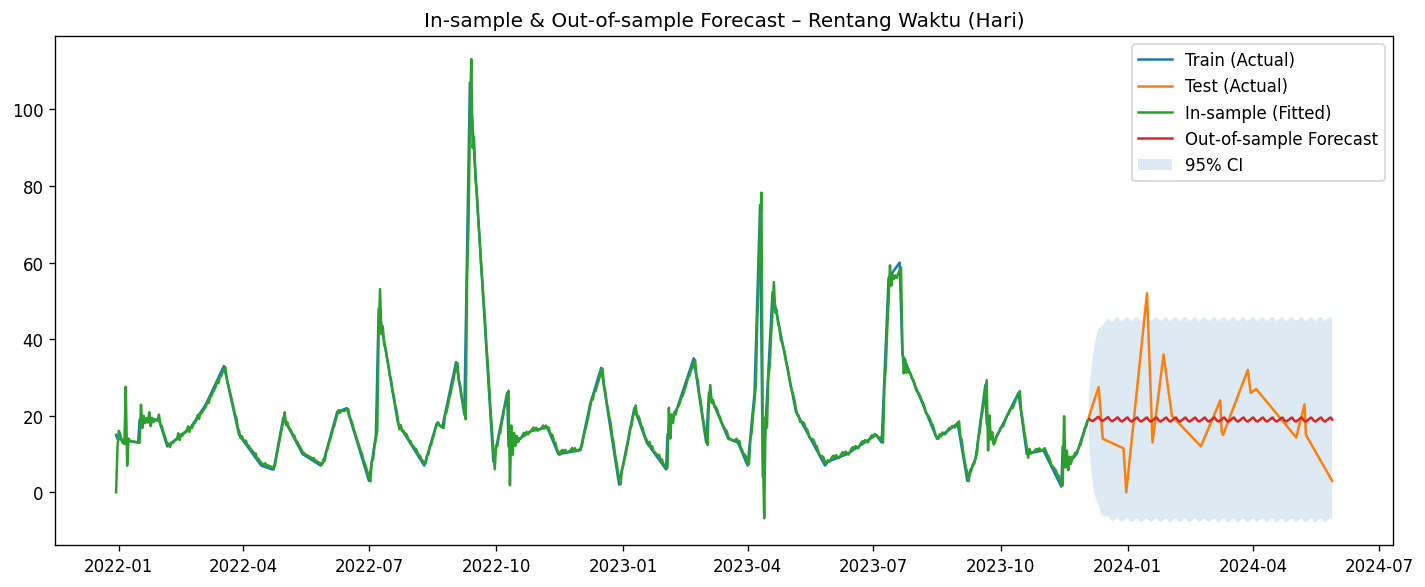


=== OUT-OF-SAMPLE FORECAST (head) ===
             forecast   lower_95   upper_95
2023-12-04  19.228433  13.672683  24.784183
2023-12-05  18.920505   8.201166  29.639845
2023-12-06  18.670520   4.371502  32.969539
2023-12-07  18.626419   1.587665  35.665172
2023-12-08  18.992469  -0.171776  38.156715


In [30]:
# === IN-SAMPLE & OUT-OF-SAMPLE FORECAST (REVISI) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------------------------
# PREP: rapikan ts biar harian & rapi
# ---------------------------------
# ts: pandas Series berindex datetime (sudah kamu siapkan pada langkah sebelumnya)
ts = ts.copy().sort_index()

# pastikan index unik (kalau ada duplikat tanggal, ambil rata-rata)
if not ts.index.is_unique:
    ts = ts.groupby(ts.index).mean()

# set frekuensi harian & isi gap sederhana
ts = ts.asfreq("D").interpolate(limit_direction="both")

# ---------------------------------
# 1) Split 80/20
# ---------------------------------
split = int(len(ts) * 0.8)
train, test = ts.iloc[:split], ts.iloc[split:]

# ---------------------------------
# 2) Ambil order terbaik
# ---------------------------------
order = best["order"]
seasonal_order = best["seasonal_order"]  # (0,0,0,0) jika non-seasonal

# ---------------------------------
# 3) Fit model pada TRAIN
# ---------------------------------
model_train = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# ---------------------------------
# 4) IN-SAMPLE (TRAIN) fitted
# ---------------------------------
fitted = model_train.get_prediction(start=train.index[0], end=train.index[-1], dynamic=False)
pred_in = fitted.predicted_mean

# ---------------------------------
# 5) OUT-OF-SAMPLE (TEST) forecast
# ---------------------------------
fc = model_train.get_forecast(steps=len(test))
pred_out = fc.predicted_mean
conf = fc.conf_int()

# ---------------------------------
# 6) Evaluasi (tanpa argumen squared)
# ---------------------------------
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return float(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100)

metrics = {
    "IN-sample MAE":  mean_absolute_error(train, pred_in),
    "IN-sample RMSE": rmse(train, pred_in),
    "IN-sample MAPE": mape(train, pred_in),

    "OUT-of-sample MAE":  mean_absolute_error(test, pred_out),
    "OUT-of-sample RMSE": rmse(test, pred_out),
    "OUT-of-sample MAPE": mape(test, pred_out),
}

print("Order:", order, "Seasonal:", seasonal_order)
for k, v in metrics.items():
    print(f"{k:>22}: {v:,.4f}")

# ---------------------------------
# 7) Plot (opsional)
# ---------------------------------
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train (Actual)")
plt.plot(test.index, test, label="Test (Actual)")
plt.plot(pred_in.index, pred_in, label="In-sample (Fitted)")
plt.plot(pred_out.index, pred_out, label="Out-of-sample Forecast")
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.15, label="95% CI")
plt.title("In-sample & Out-of-sample Forecast – Rentang Waktu (Hari)")
plt.legend(); plt.tight_layout(); plt.show()

# ---------------------------------
# 8) Tabel hasil (angka saja)
# ---------------------------------
result_df = pd.DataFrame({
    "actual": ts,
    "fitted_train": pred_in.reindex(ts.index),
    "forecast_test": pred_out.reindex(ts.index),
    "lower_ci": conf.iloc[:,0].reindex(ts.index),
    "upper_ci": conf.iloc[:,1].reindex(ts.index),
})

# kalau hanya mau OUT-OF-SAMPLE:
out_only = pd.DataFrame({
    "forecast": pred_out,
    "lower_95": conf.iloc[:,0],
    "upper_95": conf.iloc[:,1],
})
print("\n=== OUT-OF-SAMPLE FORECAST (head) ===")
print(out_only.head())